# Indicators Of Westbound Heavy Traffic on Interstate 94

This project uses the [Metro Interstate Traffic Volume Data Set](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) which includes hourly traffic volume recorded at a traffic station approximately midway between Minneapolis and St Paul, MN.

The goal of the project is to determine indictotors of heavy traffic.

In [1]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [2]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The data set has **`48204`** rows and **`9`** columns with Dtypes of **`object`**, **`float64`**, and **`int64`**. There are no null values. Each row has traffic and weather data for the period of an hour starting from the hour beginning **`2012-10-02 09:00:00`** and ending at the hour beginning **`2018-09-30 23:00:00`**.

The **`traffic_volume`** column gives the number of cars that passed the traffic station each hour. Below shows the traffic_volume column histogram and an overview of the 5 point summary. 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
i_94['traffic_volume'].max()

7280

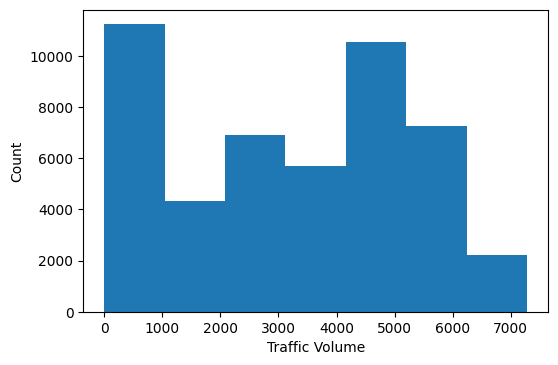

In [5]:
plt.hist(i_94['traffic_volume'], bins=7)
plt.xlabel('Traffic Volume')
plt.ylabel('Count')
plt.show()

In [6]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

* The traffic volume minimum is 0 cars per hour
* The traffic volume maximum is 7280 cars per hour
* Approximately 25% of the time there is a traffic volume of between 0 and 1193 per hour
* Approximately 25% of the time there is a traffic volume of between 4933 and 7280

## Day-time vs Night-time Traffic

Convert the 'date_time' column from object to datetime

In [7]:
i_94['date_time'].head()

0    2012-10-02 09:00:00
1    2012-10-02 10:00:00
2    2012-10-02 11:00:00
3    2012-10-02 12:00:00
4    2012-10-02 13:00:00
Name: date_time, dtype: object

In [8]:
i_94['date_time'].tail()

48199    2018-09-30 19:00:00
48200    2018-09-30 20:00:00
48201    2018-09-30 21:00:00
48202    2018-09-30 22:00:00
48203    2018-09-30 23:00:00
Name: date_time, dtype: object

In [9]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


## Split the data into 'day-time' and 'night-time'. 

For this we will arbitrarily use 7am to 7pm for the day time and 7pm to 7am for the night time.

In [10]:
day_time = i_94[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
night_time = i_94[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]

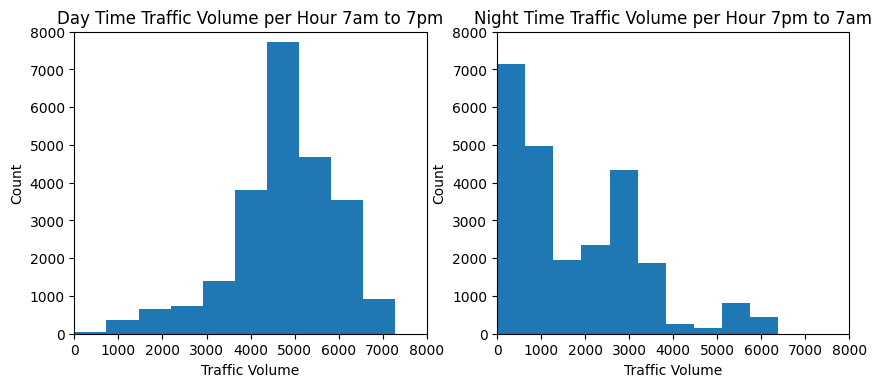

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(day_time['traffic_volume'])
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.title('Day Time Traffic Volume per Hour 7am to 7pm')
plt.xlabel('Traffic Volume')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(night_time['traffic_volume'])
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.title('Night Time Traffic Volume per Hour 7pm to 7am')
plt.xlabel('Traffic Volume')
plt.ylabel('Count')

plt.show()

In [12]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The distribution of traffic in the day, per hour 7am to 7pm is left skewed. 75% of the time there are more than 4252 cars passing the station each hour.

The distribution of traffic in the night, per hour 7pm to 7am is right skewed. 75% of the time there are less than 2819 cars passing the station each hour.

To search for indicators of heavy traffic the analysis will only use the **`day_time`** dataframe going forward.

## Aggregate Mean Traffic Volume By Month, Day Of Week, And Time Of Day

In [14]:
day_time['month'] = day_time['date_time'].dt.month
by_month = day_time.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-14-0d0913a858f7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

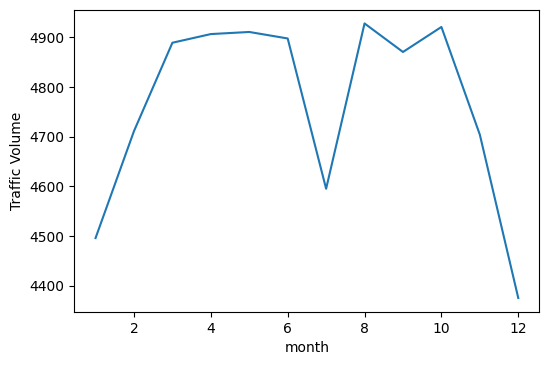

In [15]:
by_month['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.show()

The busiest times of the year are March to June and August to October. These are the hottest months of the year. 

*(This next part is not my own work, the course shows how to think about going deeper to find answers)

To understand the dip in July I can show the day-time traffic volume mean for July each year.

<ipython-input-16-203a925fd18a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



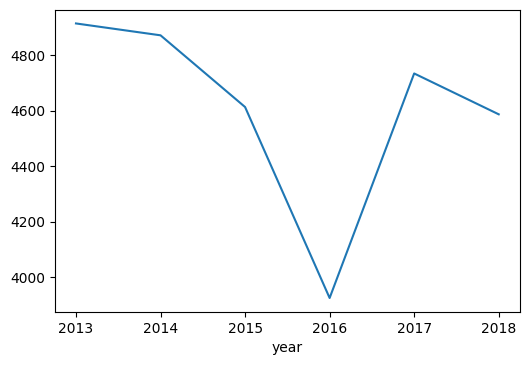

In [16]:
day_time['year'] = day_time['date_time'].dt.year
month_of_july = day_time[day_time['month'] == 7]
month_of_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

The graph shows only 2016 had a decrease in traffic volume during July. Other years it is similar to June and August. Road construction could be an explanation for this decrease. Further research would be needed to support this hypothesis.

In [17]:
day_time['day_of_week'] = day_time['date_time'].dt.dayofweek
by_day_of_week = day_time.groupby('day_of_week').mean()
by_day_of_week['traffic_volume']

<ipython-input-17-be65a3509f30>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

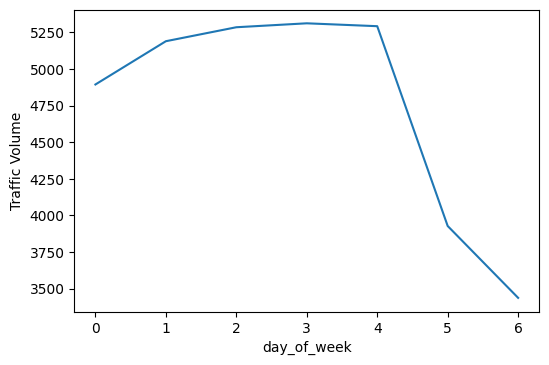

In [18]:
by_day_of_week['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.show()

The plot shows traffic decreases at weekends. To aggregate by average traffic volume during time of the day first I will separate Saturday and Sunday so they do not bring down the weekday average.

In [19]:
day_time['hour'] = day_time['date_time'].dt.hour
weekday = day_time.copy()[day_time['day_of_week'] <= 4]
weekend = day_time.copy()[day_time['day_of_week'] >= 5]
by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
print(by_hour_weekday['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-19-8b1ee0bfe6f5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



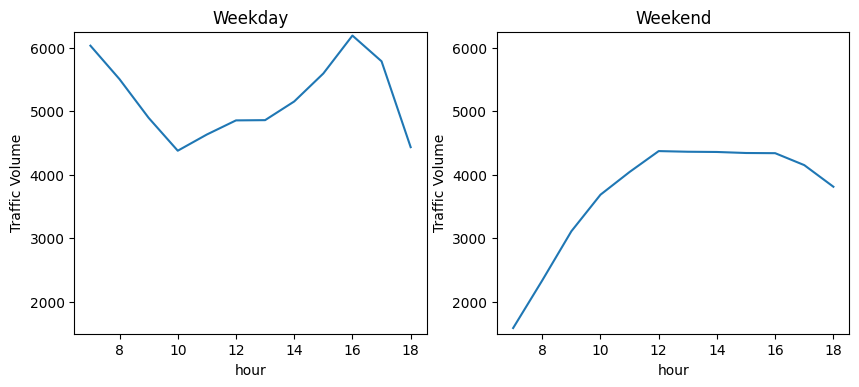

In [20]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
by_hour_weekday['traffic_volume'].plot.line()
plt.ylim(1500, 6250)
plt.title('Weekday')
plt.ylabel('Traffic Volume')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(1500, 6250)
plt.title('Weekend')
plt.ylabel('Traffic Volume')

plt.show()

(Based on day-time hours between 7am and 7pm)
* The quietest times on weekdays are busier than the busiest times on the weekends
* Busiest times on weekdays are before 9am and 3pm to 5pm
* Quietest times on weekdays are 10am to 1pm and after 5.30pm
* Busiest times on weekends are 11am to 6pm
* Quietest times on weekends are before 11am

## Weather Indicators

The following columns show numerical weather data:

* temp (average temperature per hour in kelvin temperature)
* rain_1h (amount in mm per hour)
* snow_1h (amount in mm per hour)
* clouds_all (percentage of cloud cover)

In [21]:
weekday.corr()['traffic_volume']

temp              0.139999
rain_1h           0.002728
snow_1h          -0.008016
clouds_all       -0.081708
traffic_volume    1.000000
month            -0.030233
year             -0.030165
day_of_week       0.148035
hour              0.014579
Name: traffic_volume, dtype: float64

The highest correlation is between temp and traffic_volume but is weak at only 0.139999.

In [22]:
# convert the temp column from kelvin to celsius
weekday['temp'].head()

0    288.28
1    289.36
2    289.58
3    290.13
4    291.14
Name: temp, dtype: float64

In [23]:
weekday['temp'] = weekday['temp'] - 273.15
weekday['temp'].head()

0    15.13
1    16.21
2    16.43
3    16.98
4    17.99
Name: temp, dtype: float64

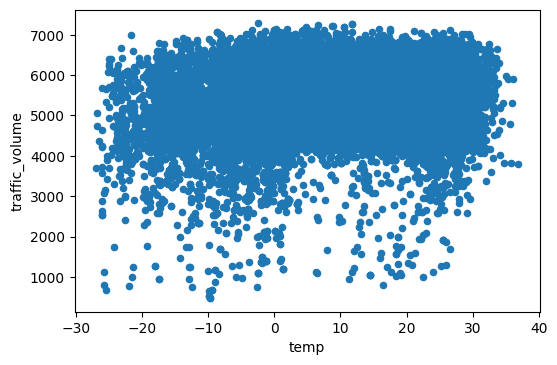

In [24]:
weekday.plot.scatter('temp', 'traffic_volume')

There is no correlation between numerical weather indicators and traffic volume.

The **`weather_main`** and **`weather_description`** columns show categorical weather data.

In [25]:
weather_main = weekday.groupby('weather_main').mean()
weather_description = weekday.groupby('weather_description').mean()

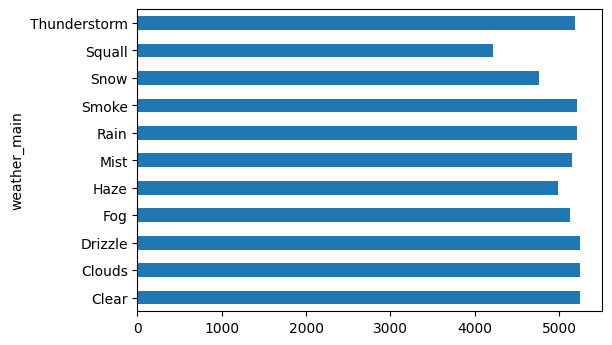

In [26]:
weather_main['traffic_volume'].plot.barh()
plt.show()

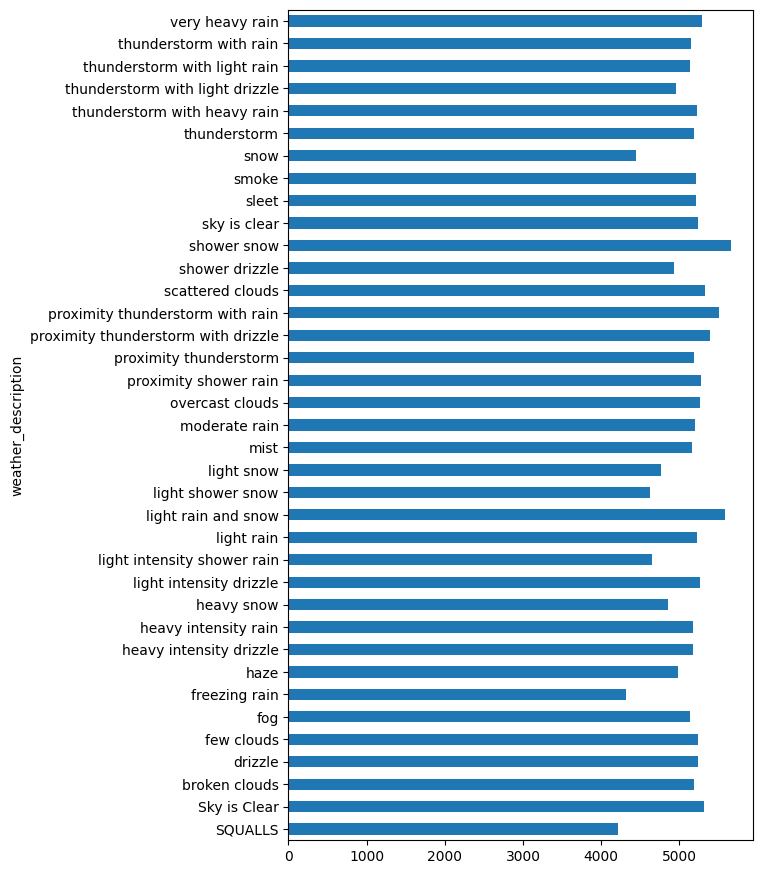

In [27]:
weather_description['traffic_volume'].plot.barh(figsize=(6, 11))

**`light rain and snow`** and **`shower snow`** are possible weather indicators of heavier traffic. A reason could be that people are still willing to drive in these conditions, just at slower speeds. As weather conditions worsen less people are likely to drive at all.



## Conclusion

This project has shown the strength to which **`Time`** and **`Weather`** are indicators of westbound heavy traffic on the I-94.

#### Time

* Warmer months have a higher traffic volume that colder months
* Weekdays have a higher traffic volume than weekends
* Weekdays have a higher traffic volume between 7am - 9am and 3pm - 5pm
* Weekends have a higher traffic volume between 11am and 6pm

#### Weather

* Light rain and snow/shower snow may indicate a higher traffic volume